In [ ]:
# train_model.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Load dataset
data = pd.read_csv("adult 3.csv")

#  Clean the data
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]
data = data[~data['education'].isin(['5th-6th', '1st-4th', 'Preschool'])]
data = data[(data['age'] >= 17) & (data['age'] <= 75)]
data.drop(columns=['education'], inplace=True)

# Define features & target
X = data.drop(columns='income')
y = data['income']

# Column types
numerical_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
pipeline.fit(X_train, y_train)

# Save pipeline
joblib.dump(pipeline, 'model_pipeline.pkl')
print(" Model pipeline saved as 'model_pipeline.pkl'")

 Model pipeline saved as 'model_pipeline.pkl'


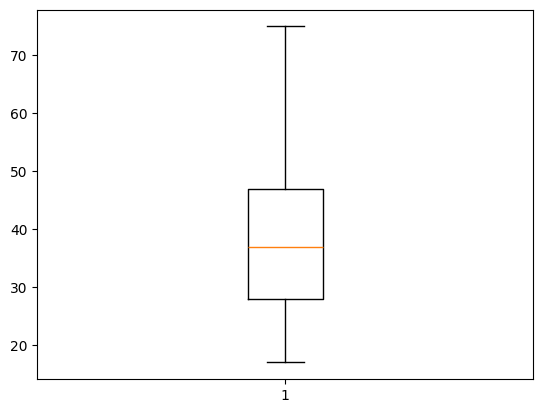

In [ ]:
#outlayer
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data again
data = pd.read_csv("adult 3.csv")
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]
data = data[~data['education'].isin(['5th-6th', '1st-4th', 'Preschool'])]
data = data[(data['age'] >= 17) & (data['age'] <= 75)]
data.drop(columns=['education'], inplace=True)

X = data.drop(columns='income')
y = data['income']

# Select only numeric features (for this loop-based test)
X = X.select_dtypes(include='number')  # Only numerical data for simplicity

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to test
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Store results
results = {}

# Train & Evaluate
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)  #  Fit the correct pipeline
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n🔸 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


🔸 LogisticRegression Accuracy: 0.8148
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7277
        >50K       0.68      0.40      0.51      2247

    accuracy                           0.81      9524
   macro avg       0.76      0.67      0.70      9524
weighted avg       0.80      0.81      0.80      9524


🔸 RandomForest Accuracy: 0.8133
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      7277
        >50K       0.62      0.53      0.57      2247

    accuracy                           0.81      9524
   macro avg       0.74      0.72      0.73      9524
weighted avg       0.81      0.81      0.81      9524


KNN Accuracy: 0.8080
              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      7277
        >50K       0.62      0.49      0.55      2247

    accuracy                           0.81      9524
   macro avg       0.73      0.70 

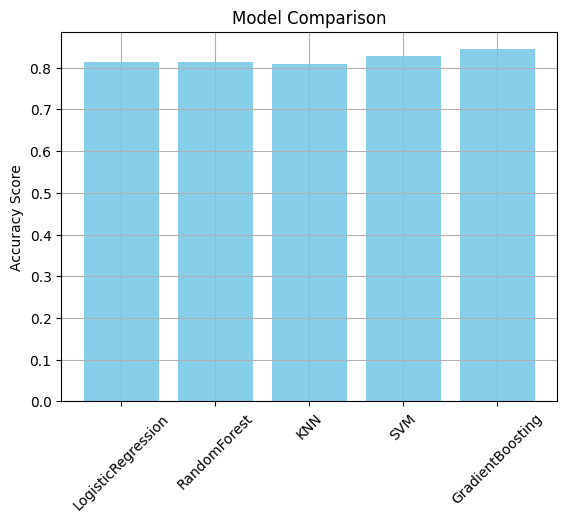

In [ ]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")

LogisticRegression: 0.8149
RandomForest: 0.8136
KNN: 0.7854
SVM: 0.8027
GradientBoosting: 0.8438

✅ Best model: GradientBoosting with accuracy 0.8438
✅ Saved best model as best_model.pkl


In [ ]:
!pip install streamlit pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load("model_pipeline.pkl")

# Streamlit settings
st.set_page_config(page_title="💼 Salary Predictor", page_icon="💸", layout="centered")

# ---------- 🎨 CSS Styling ----------
st.markdown("""
    <style>
        body {
            background-color: #F5F7FA;
        }
        .main {
            background-color: white;
            padding: 2rem;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }
        .stButton>button {
            background-color: #4CAF50;
            color: white;
            font-weight: bold;
        }
        .stDownloadButton>button {
            background-color: #2196F3;
            color: white;
            font-weight: bold;
        }
    </style>
""", unsafe_allow_html=True)

# Title
st.markdown("<h1 style='color:#1f77b4;'> Salary Classification Using ML</h1>", unsafe_allow_html=True)
st.markdown("<h4 style='color:#444;'>Predict if a person earns >50K or ≤50K based on their details.</h4>", unsafe_allow_html=True)
st.markdown("---")

# Sidebar Inputs
st.sidebar.title(" Input Employee Info")

age = st.sidebar.slider(" Age", 17, 75, 30)
fnlwgt = st.sidebar.number_input(" Final Weight (fnlwgt)", 10000, 1000000, 100000)
educational_num = st.sidebar.slider(" Education Number", 1, 16, 10)
capital_gain = st.sidebar.number_input(" Capital Gain", 0, 99999, 0)
capital_loss = st.sidebar.number_input(" Capital Loss", 0, 4356, 0)

workclass = st.sidebar.selectbox(" Workclass", [
    'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov',
    'Local-gov', 'State-gov'
])
marital_status = st.sidebar.selectbox(" Marital Status", [
    'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed'
])
occupation = st.sidebar.selectbox(" Occupation", [
    'Tech-support', 'Craft-repair', 'Other-service', 'Sales',
    'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners',
    'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing',
    'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'
])
relationship = st.sidebar.selectbox("Relationship", [
    'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'
])
race = st.sidebar.selectbox(" Race", ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
gender = st.sidebar.selectbox(" Gender", ['Male', 'Female'])
native_country = st.sidebar.selectbox(" Native Country", [
    'United-States', 'Mexico', 'Philippines', 'Germany', 'Canada', 'India'
])
hours_per_week = st.sidebar.slider(" Hours per Week", 1, 99, 40)

# Input dataframe
input_df = pd.DataFrame({
    'age': [age],
    'fnlwgt': [fnlwgt],
    'educational-num': [educational_num],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'hours-per-week': [hours_per_week],
    'workclass': [workclass],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'native-country': [native_country]
})

# Input Preview
st.markdown("###  Preview Input Data")
st.dataframe(input_df)

# Predict
if st.button(" Predict Salary Class"):
    prediction = model.predict(input_df)[0]
    if prediction == '>50K':
        st.success(" Prediction: **Income > 50K**")
        st.balloons()
    else:
        st.error("Prediction: **Income ≤ 50K**")

# Batch Prediction
st.markdown("---")
st.markdown("###  Upload CSV for Batch Prediction")
uploaded_file = st.file_uploader("Upload CSV file", type="csv")

if uploaded_file is not None:
    batch_df = pd.read_csv(uploaded_file)
    try:
        predictions = model.predict(batch_df)
        batch_df["Prediction"] = predictions
        st.write(" Prediction Results")
        st.dataframe(batch_df.head())

        csv = batch_df.to_csv(index=False).encode("utf-8")
        st.download_button(" Download Results", csv, "salary_predictions.csv", "text/csv")
    except Exception as e:
        st.error(" Error while predicting. Please check your file format.")

Overwriting app.py


In [ ]:
import os
import threading

def run_streamlit():
  os.system('streamlit run app.py --server.port 8501 ')
thread=threading.Thread(target=run_streamlit)
thread.start()

In [ ]:
!ngrok authtoken

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
import time

time.sleep(5)

public_url=ngrok.connect(8501)
print('your streamlit application is live hear',public_url)

your streamlit application is live hear NgrokTunnel: "https://a6b9cc29a107.ngrok-free.app" -> "http://localhost:8501"
